## TODO

- EDA - check the dataset, nulls, collumns, shape
- Clean database

In [3]:
import pandas as pd

df = pd.read_csv('../src/taxipred/data/taxi_trip_pricing.csv')

SAVE_VIS_PATH = '../src/taxipred/visualization'
SAVE_DATA_PATH = '../src/taxipred/processed_data'

df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [4]:
df.info(), df.shape

# 1000 rows 11 columns
# 950 rows on most columns is non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


(None, (1000, 11))

In [5]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [6]:
df.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

In [7]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [8]:
df['Day_of_Week'].value_counts()
df['Weather'].value_counts()
df['Traffic_Conditions'].value_counts()
df['Time_of_Day'].value_counts()

Time_of_Day
Afternoon    371
Morning      283
Evening      203
Night         93
Name: count, dtype: int64

In [9]:
df['Weather'].isnull().value_counts()

Weather
False    950
True      50
Name: count, dtype: int64

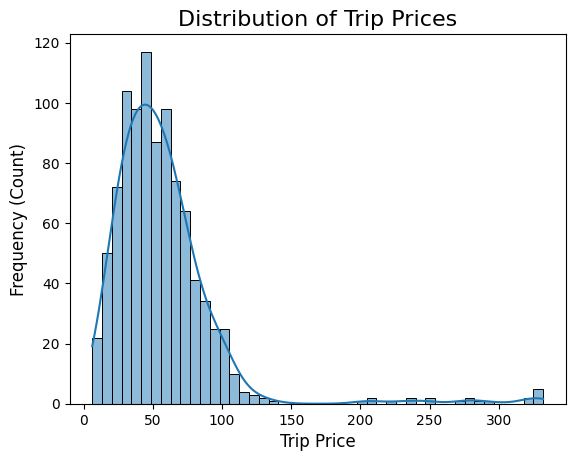

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["Trip_Price"], kde=True);

plt.title("Distribution of Trip Prices", fontsize=16)
plt.xlabel("Trip Price", fontsize=12)
plt.ylabel("Frequency (Count)", fontsize=12)
plt.savefig('../src/taxipred/Visualization/Distribution.png')
plt.show() 

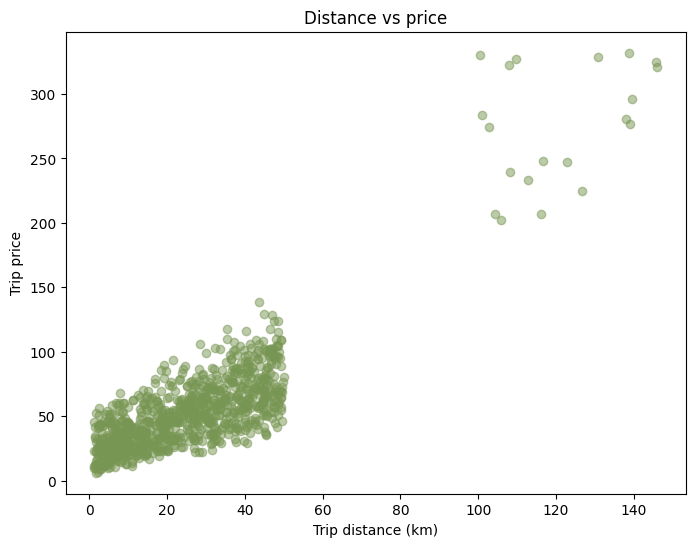

In [ ]:
GREEN = '#789653'

plt.figure(figsize=(8, 6))
plt.scatter(df["Trip_Distance_km"], df["Trip_Price"], alpha=0.5, color = GREEN)
plt.xlabel("Trip distance (km)")
plt.ylabel("Trip price")
plt.title("Distance vs price")
plt.savefig('../src/taxipred/Visualization/scatter_Dist_price.png')
plt.show()

#

np.float64(119.84)